In [1]:
import matplotlib.pyplot as plt
import numpy as np
import requests

In C:\Users\hyoun\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\hyoun\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\hyoun\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\hyoun\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\hyoun\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mpl

In [2]:
# http://webdatacommons.org/hyperlinkgraph
with open("example_index", "wb") as f:
    r = requests.get("http://webdatacommons.org/hyperlinkgraph/data/example_index")
    f.write(r.content)
with open("example_arcs", "wb") as f:
    r = requests.get("http://webdatacommons.org/hyperlinkgraph/data/example_arcs")
    f.write(r.content)

In [3]:
nodes = np.loadtxt("example_index", dtype=object)[:,0]
num_nodes = nodes.shape[0]
edges = np.loadtxt("example_arcs", dtype=int)
num_edges = edges.shape[0]

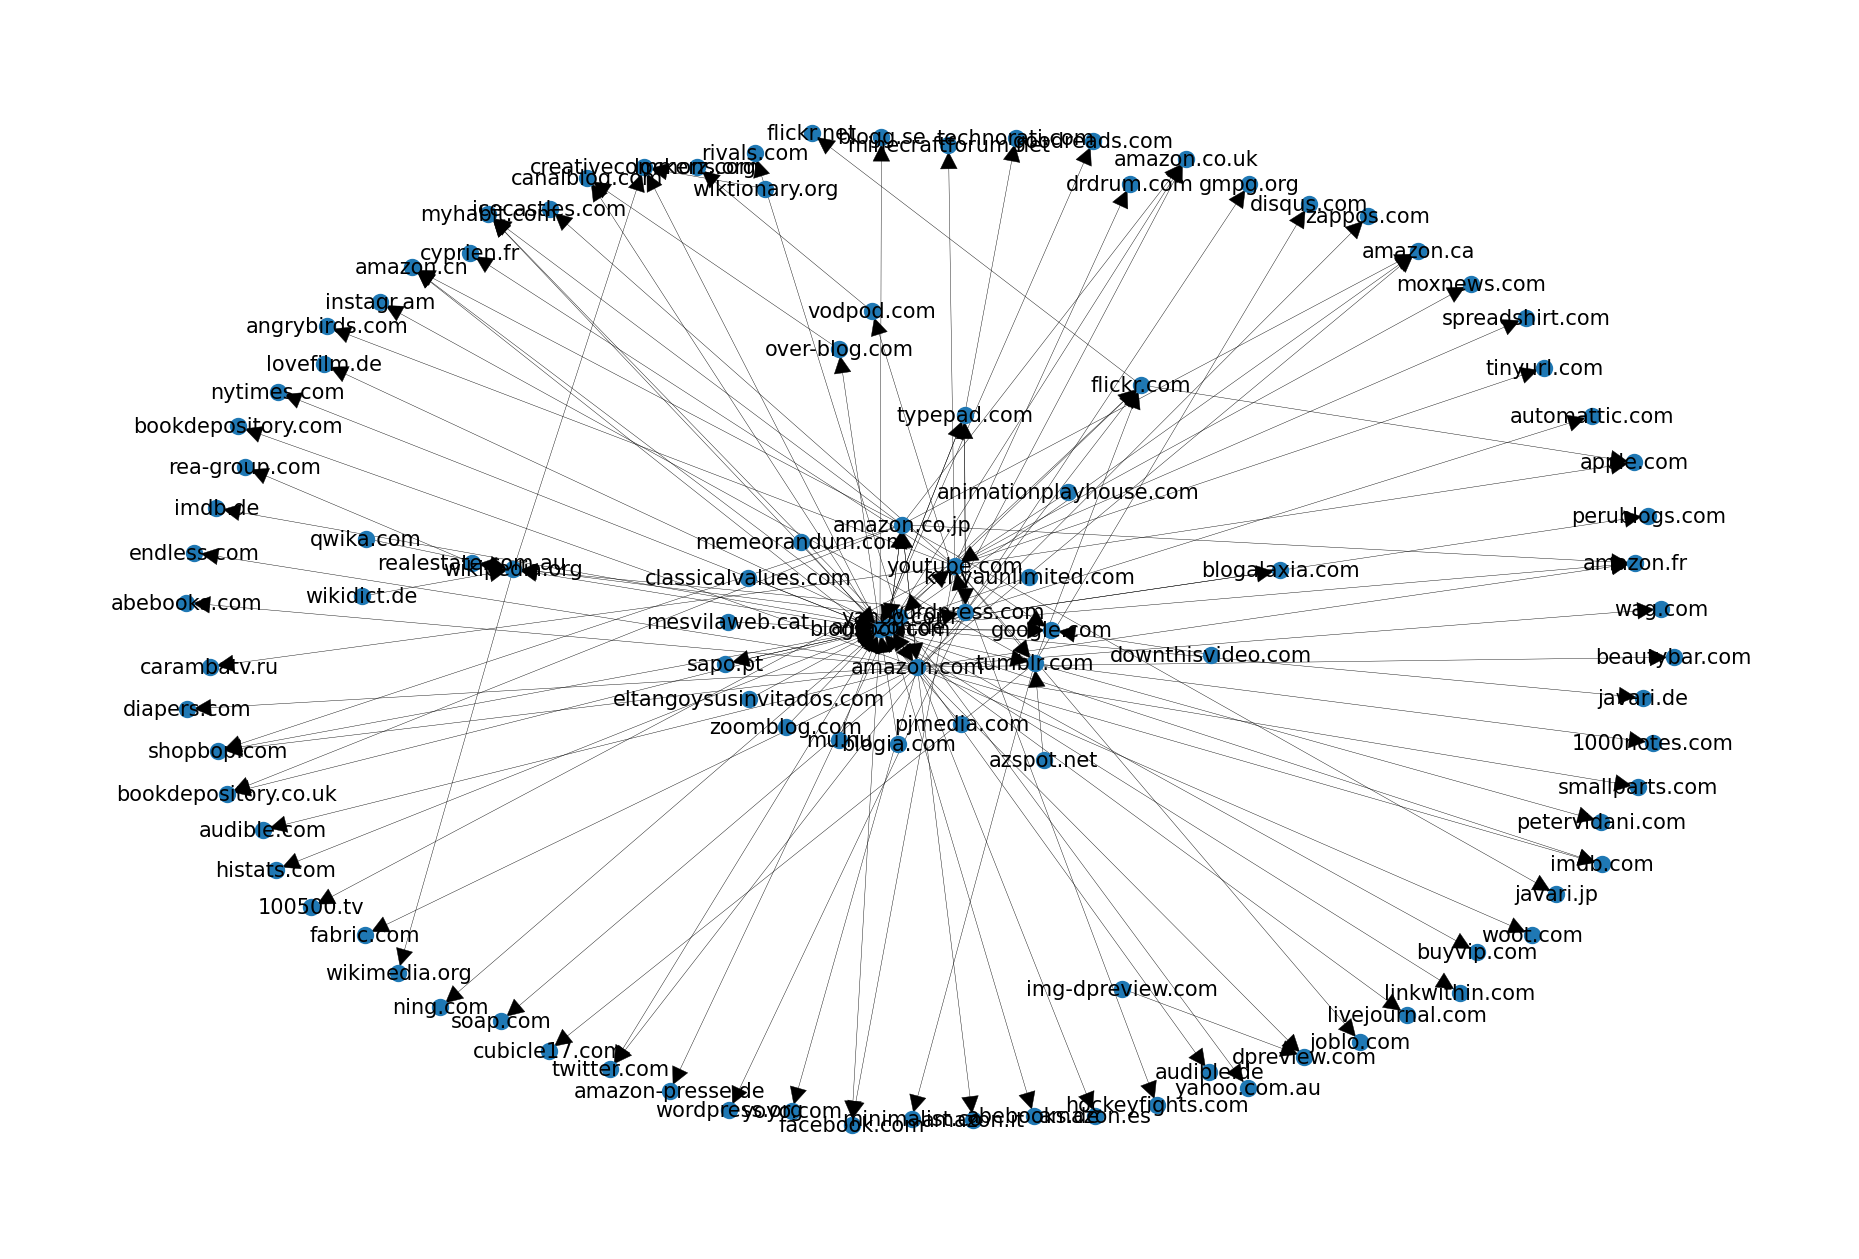

In [4]:
import networkx as nx
import matplotlib.pyplot as plt
plt.figure(dpi=300)
G = nx.DiGraph()

for e in edges:
    G.add_edge(nodes[e[0]], nodes[e[1]])
    
pos = nx.spring_layout(G, k=1, iterations=200)
nx.draw(G, pos, with_labels=True, node_size=10, font_size=5, width=0.1)

In [5]:
def pagerank(edges, beta, threshold=10^-20, epochs=100):
    # Adjacency List 만들기
    neighbors = [[] for _ in range(num_nodes)]
    for e in edges:
        neighbors[e[0]].append(e[1])
    # 벡터 초기화: 모든 값을 (1/n)으로 설정
    r = [1/num_nodes] * num_nodes
    
    for epoch in range(epochs):
        # 업데이트된 값을 저장할 벡터 초기화
        r_next = [0] * num_nodes
        # 모든 노드에서...
        for u in range(num_nodes):
            # 그 노드가 가리키는 이웃 노드에게...
            for v in neighbors[u]:
                # 현재 자신의 점수 r[u]에 (1-beta)을 곱하고, 등분하여 나눠줌
                r_next[v] += (1 - beta) * r[u] / len(neighbors[u])
        # 1-(r_next의 값들의 합)은 teleport에 의해 각 노드에 도착할 확률임
        # 그러므로, 1-(r_next의 값들의 합)을 모든 노드에게 등분하여 나눠줌
        teleport_prob = 1-sum(r_next)
        for u in range(num_nodes):
            r_next[u] += teleport_prob/num_nodes
        # 이전 벡터 r과 새로운 벡터 r_next 사이의 변화량을 합산
        delta = sum(abs(a-b) for a, b in zip(r, r_next))
        # 원래 벡터를 새로 계산한 벡터로 교체
        r = r_next
        if delta < threshold:
            break
            
    return r

In [6]:
r = pagerank(edges, 0.15)
for score, node in sorted(zip(r, nodes), reverse=True)[:10]:
    print(f"({score:.6f}) {node}")

(0.085426) blogspot.com
(0.024220) creativecommons.org
(0.021582) wikipedia.org
(0.017731) canalblog.com
(0.016119) youtube.com
(0.015904) tumblr.com
(0.015904) google.com
(0.015600) wikimedia.org
(0.015058) rea-group.com
(0.013151) yahoo.com
